In [1]:
#!pip3 install qiskit
#!pip3 install pylatexenc

In [2]:
from qiskit import *
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import rv_continuous

In [3]:
class PQC:
    def __init__(self,name):
        self.backend = Aer.get_backend('statevector_simulator');
        self.circ = QuantumCircuit(1);
        self.name = name;
        if self.name=="rz":
            self.circ.h(0);
        if self.name=="rzx":
            self.circ.h(0);
    def add(self):
        if self.name == "rz":
            th = np.random.uniform(0,2*np.pi);
            self.circ.rz(th,0);
        if self.name == "rzx":
            th1 = np.random.uniform(0,2*np.pi);
            self.circ.rz(th1,0);
            th2 = np.random.uniform(0,2*np.pi);
            self.circ.rx(th2,0);
    def remove(self):
        if self.name == "rz":
            self.circ.data.pop(1);
        if self.name == "rzx":
            self.circ.data.pop(2);
    def get(self):
        self.add();
        result = execute(self.circ,self.backend).result();
        out_state = result.get_statevector();
        self.remove(); # remove a random gate
        return np.asmatrix(out_state).T;

    def draw(self):
        th = np.random.uniform(0,2*np.pi);
        self.circ.rz(th,0);
        self.circ.draw('mpl'); # 왜 안 그려지는지 모르겠습니다
        self.circ.data.pop(1);
        

In [4]:
pqc = PQC("rzx");

In [5]:
pqc.get()

matrix([[0.39292333-0.58788711j],
        [0.39292333+0.58788711j]])

In [5]:
def Haar(F,N):
    if F<0 or F>1:
        return 0;
    return (N-1)*(1-F)**(N-2);
class Haar_dist(rv_continuous):
    def _pdf(self,x):
        return Haar(x,1*2);

def kl_divergence(p, q):
    return np.mean(p*np.log(p/q));
    #return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [6]:
len = 1000;
arr = [];
for i in range(len):
    fid = np.abs(pqc.get().getH()*pqc.get())**2;
    arr.append(fid[0,0]);
haar = [];
h = Haar_dist(a=0,b=1,name="haar");
for i in range(len):   
    haar.append(h.ppf((i+0.5)/len))

(array([14., 10., 11., 11.,  7.,  7.,  6.,  7.,  7., 11.,  9., 10., 15.,
         9., 16., 11., 17., 11.,  4.,  6.,  7.,  4., 11., 14., 10., 13.,
        11.,  9.,  6.,  9., 11., 15., 14.,  9., 10., 13., 12., 11., 14.,
        20., 12., 13.,  9.,  7.,  7.,  7.,  8., 10.,  6., 14.,  9., 15.,
        10.,  4.,  6.,  7.,  8., 12.,  7.,  8., 16., 13., 11., 15., 13.,
         9.,  5., 11.,  8.,  9., 12.,  2., 12., 11.,  9.,  9.,  7.,  5.,
        13., 15.,  3., 10.,  9.,  6., 10.,  7., 10., 13., 15., 11., 11.,
        14., 15.,  8.,  2., 10., 10.,  6.,  7., 17.]),
 array([6.21401743e-04, 1.06109520e-02, 2.06005023e-02, 3.05900525e-02,
        4.05796028e-02, 5.05691531e-02, 6.05587033e-02, 7.05482536e-02,
        8.05378038e-02, 9.05273541e-02, 1.00516904e-01, 1.10506455e-01,
        1.20496005e-01, 1.30485555e-01, 1.40475105e-01, 1.50464656e-01,
        1.60454206e-01, 1.70443756e-01, 1.80433306e-01, 1.90422857e-01,
        2.00412407e-01, 2.10401957e-01, 2.20391508e-01, 2.30381058e-01,
  

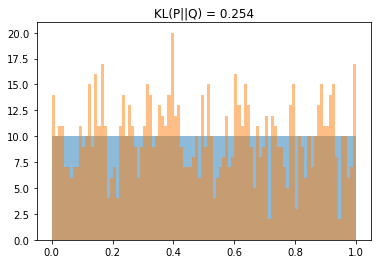

In [7]:
plt.title('KL(P||Q) = %1.3f' % kl_divergence(np.array(arr), np.array(haar)))
n_bins = 100;
# We can set the number of bins with the `bins` kwarg
# haar = np.linspace(0,1,len,endpoint=False); #true value
plt.hist(np.array(haar), bins=n_bins, alpha=0.5)
plt.hist(np.array(arr), bins=n_bins, alpha=0.5)